<img src="img/CAPM_M3.png"/>

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Capital Assets Pricing Model</span></b>
</div>

In [1]:
# import libraries
import pandas as pd
import statsmodels.api as sm

In [2]:
'''
Download monthly prices of Facebook and S&P 500 Index from 2016-04 to 2021-03
CSV file downloaded from Yahoo finance Site
start period: Apr-2016 
end period: Mar-2021
period format: DD/MM/YEAR
'''
fb = pd.read_csv('/Users/shovonsengupta/Desktop/All/EC-Council Course/AI_for_Finance/Section_3_Linearity and Non-Linearity in Finance/dataset/FB_prices_2016_2021.csv', parse_dates=True, index_col='Date',)
sp_500 = pd.read_csv('/Users/shovonsengupta/Desktop/All/EC-Council Course/AI_for_Finance/Section_3_Linearity and Non-Linearity in Finance/dataset/^GSPC.csv', parse_dates=True, index_col='Date')

In [3]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-01,113.750000,120.790001,106.309998,117.580002,117.580002,741613800
2016-05-01,117.830002,121.080002,115.879997,118.809998,118.809998,460544200
2016-06-01,118.500000,119.440002,108.230003,114.279999,114.279999,450876100
2016-07-01,114.199997,128.330002,112.970001,123.940002,123.940002,470108600
2016-08-01,123.849998,126.730003,122.070000,126.120003,126.120003,365670900


In [4]:
sp_500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-01,2056.62,2111.05,2033.80,2065.30,2065.30,8.112499e+10
2017-04-01,2362.34,2398.16,2328.95,2384.20,2384.20,6.526567e+10
2018-04-01,2633.45,2717.49,2553.80,2648.05,2648.05,6.964859e+10
2019-04-01,2848.63,2949.52,2848.63,2945.83,2945.83,6.960484e+10
2020-04-01,2498.08,2954.86,2447.49,2912.43,2912.43,1.231634e+11


In [7]:
print(fb.shape)
print(sp_500.shape)

(61, 6)
(61, 6)


In [5]:
# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', 'SP_500']

In [6]:
# check the head of the dataframe
monthly_prices.head()

,FB,SP_500
Date,,
2016-04-01,117.580002,2065.30
2016-05-01,118.809998,2096.95
2016-06-01,114.279999,2098.86
2016-07-01,123.940002,2173.60
2016-08-01,126.120003,2170.95


In [7]:
monthly_prices.tail()

,FB,SP_500
Date,,
2020-12-01,273.160004,3756.07
2021-01-01,258.329987,3714.24
2021-02-01,257.619995,3811.15
2021-03-01,290.109985,3943.34
2021-03-19,290.109985,3913.10


In [8]:
# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
clean_monthly_returns.head()

,FB,SP_500
Date,,
2016-05-01,0.010461,0.015325
2016-06-01,-0.038128,0.000911
2016-07-01,0.084529,0.035610
2016-08-01,0.017589,-0.001219
2016-09-01,0.017047,-0.001234


In [9]:
# split dependent and independent variable
X = clean_monthly_returns['SP_500']
y = clean_monthly_returns['FB']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     48.03
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           3.84e-09
Time:                        19:11:41   Log-Likelihood:                 83.824
No. Observations:                  60   AIC:                            -163.6
Df Residuals:                      58   BIC:                            -159.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.008      0.421      0.6

<img src="img/FB_Beta_M3.png"/>

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">From CAPM to the Fama-French Factor Model</span></b>
</div>

<img src="img/FAMA_M3.png"/>

In [10]:
# !pip install linearmodels

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Implementing the Fama-French Factor Model</span></b>
</div>

In [11]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf

__Download data from prof. French's website:!__

In [82]:
RISKY_ASSET = 'FB'
START_DATE = '2010-10-30'
END_DATE = '2020-10-30'

In [83]:
# F-F_Research_Data_Factors.CSV
# Load data from the source CSV file and keep only the monthly data:
# load data from csv
factor_df = pd.read_csv('/Users/shovonsengupta/Desktop/All/EC-Council Course/AI_for_Finance/Section_3_Linearity and Non-Linearity in Finance/dataset/F-F_Research_Data_Factors.csv', skiprows=3)

# identify where the annual data starts
STR_TO_MATCH = ' Annual Factors: January-December '
indices = factor_df.iloc[:, 0] == STR_TO_MATCH
start_of_annual = factor_df[indices].index[0]

# keep only monthly data
factor_df = factor_df[factor_df.index < start_of_annual]

In [84]:
factor_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.30,-2.87,0.22
1,192608,2.64,-1.40,4.19,0.25
2,192609,0.36,-1.32,0.01,0.23
3,192610,-3.24,0.04,0.51,0.32
4,192611,2.53,-0.20,-0.35,0.31


In [85]:
factor_df.shape

(1121, 5)

In [86]:
factor_df.tail()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
1116,201907,1.19,-2.07,0.14,0.19
1117,201908,-2.58,-2.41,-4.99,0.16
1118,201909,1.44,-0.90,6.71,0.18
1119,201910,2.06,0.25,-2.07,0.15
1120,201911,3.87,0.86,-1.88,0.12


In [87]:
# Rename columns of the DataFrame, set a datetime index and filter by dates:
# rename columns
factor_df.columns = ['date', 'mkt', 'smb', 'hml', 'rf']

# convert strings to datetime
factor_df['date'] = pd.to_datetime(factor_df['date'], 
                                   format='%Y%m').dt.strftime("%Y-%m")

# set index
factor_df = factor_df.set_index('date')

# filter only required dates
factor_df = factor_df.loc[START_DATE:END_DATE]

In [88]:
factor_df.shape

(109, 4)

In [89]:
factor_df.head()

,mkt,smb,hml,rf
date,,,,
2010-11,0.60,3.70,-0.90,0.01
2010-12,6.82,0.69,3.82,0.01
2011-01,1.99,-2.47,0.82,0.01
2011-02,3.49,1.53,1.10,0.01
2011-03,0.45,2.60,-1.58,0.01


In [90]:
factor_df.tail()

,mkt,smb,hml,rf
date,,,,
2019-07,1.19,-2.07,0.14,0.19
2019-08,-2.58,-2.41,-4.99,0.16
2019-09,1.44,-0.90,6.71,0.18
2019-10,2.06,0.25,-2.07,0.15
2019-11,3.87,0.86,-1.88,0.12


In [91]:
# Convert the values to numeric and divide by 100
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)
factor_df.head()

,mkt,smb,hml,rf
date,,,,
2010-11,0.0060,0.0370,-0.0090,0.0001
2010-12,0.0682,0.0069,0.0382,0.0001
2011-01,0.0199,-0.0247,0.0082,0.0001
2011-02,0.0349,0.0153,0.0110,0.0001
2011-03,0.0045,0.0260,-0.0158,0.0001


In [92]:
# Download the prices of the risky asset
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 2127 rows of data.


In [93]:
# Calculate monthly returns on the risky asset:
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()

y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2012-06    0.050676
2012-07   -0.301929
2012-08   -0.168125
2012-09    0.199336
2012-10   -0.025392
Name: rtn, dtype: float64

In [94]:
# Merge the datasets and calculate excess returns:
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

In [95]:
# Estimate the three-factor model:
# define and fit the regression model 
ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml', 
                   data=ff_data).fit()

# print results 
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     4.932
Date:                Mon, 22 Mar 2021   Prob (F-statistic):            0.00330
Time:                        19:36:56   Log-Likelihood:                 82.857
No. Observations:                  90   AIC:                            -157.7
Df Residuals:                      86   BIC:                            -147.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0134      0.011      1.198      0.2

__Bonus components__

In [31]:
# Import the libraries:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

In [32]:
# Print available datasets (here only first 5):
get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [33]:
# Download the selected dataset
ff_dict = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2013-01-01')

In [34]:
ff_dict.keys()

dict_keys([0, 1, 'DESCR'])

In [35]:
print(ff_dict['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202102 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2021 Kenneth R. French

  0 : (98 rows x 4 cols)
  1 : Annual Factors: January-December (8 rows x 4 cols)


In [36]:
# View the monthly dataset
ff_dict[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2013-01,5.57,0.36,0.98,0.0
2013-02,1.29,-0.42,0.13,0.0
2013-03,4.03,0.75,-0.23,0.0
2013-04,1.55,-2.40,0.53,0.0
2013-05,2.80,1.66,2.61,0.0


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Implementing the rolling three-factor model on a portfolio of assets</span></b>
</div>

In [37]:
# Import the libraries:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web

In [38]:
# Define the parameters:
ASSETS = ['AMZN', 'GOOG', 'AAPL', 'MSFT']
WEIGHTS = [0.25, 0.25, 0.25, 0.25]
START_DATE = '2010-12-31'
END_DATE = '2020-12-31'

In [39]:
# Download the factor related data:
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()

In [40]:
# Download the prices of risky assets from Yahoo Finance:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 2518 rows of data.


In [41]:
# Calculate the monthly returns on the risky assets:
asset_df = asset_df['Adj Close'].resample('M').last().pct_change().dropna()
# reformat index for joining
asset_df.index = asset_df.index.strftime('%Y-%m')

In [43]:
# Calculate the portfolio returns:
import numpy as np
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values, WEIGHTS)
asset_df.head()

,AAPL,AMZN,GOOG,MSFT,portfolio_returns
Date,,,,,
2011-01,0.051959,-0.057556,0.010758,-0.006449,-0.000322
2011-02,0.040935,0.021516,0.021720,-0.035806,0.012091
2011-03,-0.013307,0.039471,-0.043430,-0.044770,-0.015509
2011-04,0.004649,0.087048,-0.072704,0.020874,0.009967
2011-05,-0.006569,0.004494,-0.027715,-0.028784,-0.014644


<AxesSubplot:xlabel='Date'>

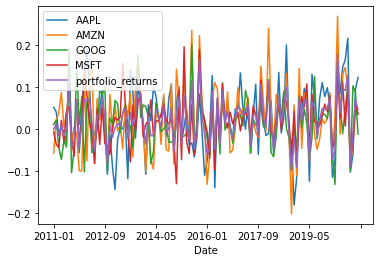

In [44]:
asset_df.plot()

In [45]:
# Merge the datasets:
ff_data = asset_df.join(df_three_factor).drop(ASSETS, axis=1)
ff_data.columns = ['portf_rtn', 'mkt', 'smb', 'hml', 'rf']
ff_data['portf_ex_rtn'] = ff_data.portf_rtn - ff_data.rf

In [46]:
ff_data.head()

,portf_rtn,mkt,smb,hml,rf,portf_ex_rtn
Date,,,,,,
2011-01,-0.000322,0.0199,-0.0252,0.0082,0.0001,-0.000422
2011-02,0.012091,0.0349,0.0153,0.0129,0.0001,0.011991
2011-03,-0.015509,0.0046,0.0258,-0.0176,0.0001,-0.015609
2011-04,0.009967,0.0290,-0.0037,-0.0243,0.0000,0.009967
2011-05,-0.014644,-0.0127,-0.0058,-0.0205,0.0000,-0.014644


In [47]:
# Define a function for the rolling n-factor model
def rolling_factor_model(input_data, formula, window_size):
    '''
    Function for estimating the Fama-French (n-factor) model using a rolling window of fixed size.
    
    Parameters
    ------------
    input_data : pd.DataFrame
        A DataFrame containing the factors and asset/portfolio returns
    formula : str
        `statsmodels` compatible formula representing the OLS regression  
    window_size : int
        Rolling window length.
    
    Returns
    -----------
    coeffs_df : pd.DataFrame
        DataFrame containing the intercept and the three factors for each iteration.
    '''

    coeffs = []

    for start_index in range(len(input_data) - window_size + 1):        
        end_index = start_index + window_size

        # define and fit the regression model 
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_index:end_index]
        ).fit()
   
        # store coefficients
        coeffs.append(ff_model.params)
    
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

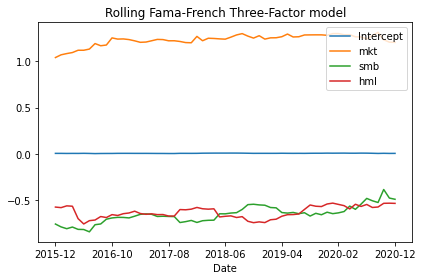

In [49]:
# Estimate the rolling three-factor model and plot the results:
import matplotlib.pyplot as plt
%matplotlib inline

MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'
results_df = rolling_factor_model(ff_data, 
                                  MODEL_FORMULA, 
                                  window_size=60)
results_df.plot(title = 'Rolling Fama-French Three-Factor model')

plt.tight_layout()
plt.show()

__Implementing the four- and five-factor models in Python__

In [50]:
# Import the libraries:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web

In [74]:
# Specify the risky asset and the time horizon:
RISKY_ASSET = 'AMZN'
START_DATE = '2010-12-31'
END_DATE = '2020-12-31'

In [75]:
# Download the risk factors from prof. French's website:
# three factors 
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor.index = df_three_factor.index.format()

# momentum factor
df_mom = web.DataReader('F-F_Momentum_Factor', 'famafrench', 
                        start=START_DATE)[0]
df_mom.index = df_mom.index.format()

# five factors
df_five_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 
                                'famafrench', 
                                start=START_DATE)[0]
df_five_factor.index = df_five_factor.index.format()

In [76]:
# Download the data of the risky asset from Yahoo Finance:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 2518 rows of data.


In [77]:
# Calculate monthly returns:
y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = 'return'

In [78]:
four_factor_data.head()

,mkt,smb,hml,rf,mom,rtn,excess_rtn
2014-01,-0.0332,0.0087,-0.0202,0.0,0.0174,-0.100554,-0.100554
2014-02,0.0465,0.0031,-0.0036,0.0,0.0205,0.009507,0.009507
2014-03,0.0043,-0.0185,0.0490,0.0,-0.0338,-0.071058,-0.071058
2014-04,-0.0019,-0.0421,0.0112,0.0,-0.0377,-0.095847,-0.095847
2014-05,0.0206,-0.0190,-0.0012,0.0,0.0121,0.027685,0.027685


In [79]:
# Merge the datasets for the four-factor models:
# join all datasets on the index
four_factor_data = df_three_factor.join(df_mom).join(y)

# rename columns
four_factor_data.columns = ['mkt', 'smb', 'hml', 'rf', 'mom', 'rtn']

# divide everything (except returns) by 100
four_factor_data.loc[:, four_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
# four_factor_data.index = pd.to_datetime(four_factor_data.index, 
#                                         format='%Y-%m')

# select period of interest
four_factor_data = four_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
four_factor_data['excess_rtn'] = four_factor_data.rtn - four_factor_data.rf

four_factor_data.head()

,mkt,smb,hml,rf,mom,rtn,excess_rtn
2011-01,0.0199,-0.0252,0.0082,0.0001,-0.0029,-0.057556,-0.057656
2011-02,0.0349,0.0153,0.0129,0.0001,0.0208,0.021516,0.021416
2011-03,0.0046,0.0258,-0.0176,0.0001,0.0352,0.039471,0.039371
2011-04,0.0290,-0.0037,-0.0243,0.0000,0.0006,0.087048,0.087048
2011-05,-0.0127,-0.0058,-0.0205,0.0000,-0.0057,0.004494,0.004494


In [80]:
# Merge the datasets for the five-factor models:
# join all datasets on the index
five_factor_data = df_five_factor.join(y)

# rename columns
five_factor_data.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']

# divide everything (except returns) by 100
five_factor_data.loc[:, five_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
# five_factor_data.index = pd.to_datetime(five_factor_data.index, 
#                                         format='%Y-%m')

# select period of interest
five_factor_data = five_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
five_factor_data['excess_rtn'] = five_factor_data.rtn - five_factor_data.rf

five_factor_data.head()

,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn
2011-01,0.0199,-0.0243,0.0082,-0.0064,0.0075,0.0001,-0.057556,-0.057656
2011-02,0.0349,0.0163,0.0129,-0.0196,0.0095,0.0001,0.021516,0.021416
2011-03,0.0046,0.0266,-0.0176,0.0158,-0.0001,0.0001,0.039471,0.039371
2011-04,0.0290,-0.0056,-0.0243,0.0088,-0.0079,0.0000,0.087048,0.087048
2011-05,-0.0127,-0.0060,-0.0205,0.0208,-0.0159,0.0000,0.004494,0.004494


In [81]:
# Estimate the four-factor model:
four_factor_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml + mom', 
                            data=four_factor_data).fit()

print(four_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     19.76
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.11e-12
Time:                        19:35:59   Log-Likelihood:                 163.11
No. Observations:                 120   AIC:                            -316.2
Df Residuals:                     115   BIC:                            -302.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0076      0.006      1.219      0.2

In [96]:
# Estimate the five-factor model:
five_factor_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml + rmw + cma', 
                            data=five_factor_data).fit()

print(five_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     17.28
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.07e-12
Time:                        19:37:48   Log-Likelihood:                 165.56
No. Observations:                 120   AIC:                            -319.1
Df Residuals:                     114   BIC:                            -302.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0086      0.006      1.406      0.1